# Structural estimation

### Ex 1

(a)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize as opt
import math
import pandas as pd
import scipy
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Dark2')
from scipy import stats

In [2]:
meddata = np.loadtxt('clms.txt')

In [3]:
print('Mean: \t', meddata.mean(), "\n"\
     'Median: \t', np.median(meddata), '\n'\
     'Max: \t', meddata.max(), '\n'\
     'Min: \t', meddata.min(), '\n')

Mean: 	 720.2779753272437 
Median: 	 172.21 
Max: 	 227967.25 
Min: 	 0.01 



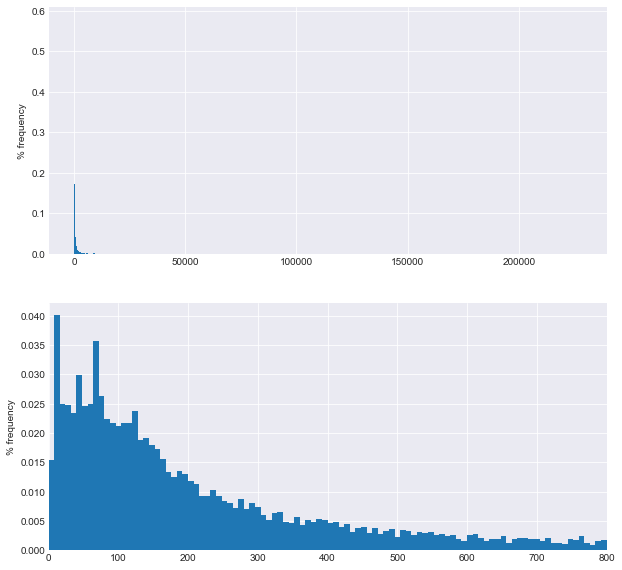

In [4]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10, 10))
palette = plt.get_cmap('Dark2')

weights = (1 / meddata.shape[0]) * np.ones_like(meddata)

plt.subplot(2, 1, 1)
plt.hist(meddata, bins=1000, weights=weights)
plt.ylabel('% frequency')

plt.subplot(2, 1, 2)
plt.hist(meddata, bins=100, range=(0, 800), weights=weights)
plt.xlim(0, 800)
plt.ylabel('% frequency')

plt.show()

(b)

In [5]:
def gamma_pdf(x, a, b): 
    '''Get me the gamma prob dist for some data'''
    G = math.gamma(a)
    pdf = (1/((b**a)*G))*(x**(a-1))*(np.exp(-(x/b)))
    return pdf
    
def log_lik_gam(xvals, alpha, beta):
    '''Get me the log likelihood of the gamma pdf for some data'''
    pdf_vals = gamma_pdf(xvals, alpha, beta)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit_gamma(params, *args):
    '''Define a criterion function to minimise
    in this case the negative of the log likelihood'''
    a, b = params
    x = args
    log_lik_val = log_lik_gam(x, a, b)
    neg_log_lik_val = -log_lik_val
    return -log_lik_val

In [6]:
b_init = meddata.var()/meddata.mean()  # initial guess at b
a_init = meddata.mean()/b_init  # initial guess at a
params_init = np.array([a_init, b_init])

In [7]:
mle_args = (meddata)
results = opt.minimize(crit_gamma, params_init, args=meddata, method ='L-BFGS-B', bounds=((1e-5, None), (1e-5, None)))
a_MLE, b_MLE = results.x
loglikval = -results.fun
print('a_MLE=', a_MLE, ' b_MLE=', b_MLE, 'Loglikvalmax=', loglikval)

a_MLE= 0.22175531700084541  b_MLE= 21911.06469927569 Loglikvalmax= -82076.45160566496


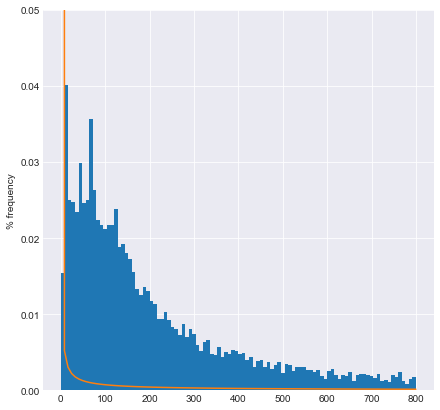

In [8]:
plt.figure(figsize=(7, 7))
plt.hist(meddata, bins=100, range=(0, 800), weights=weights)
dom = np.linspace(1e-5, 800, 100)
plt.plot(dom, gamma_pdf(dom, a_MLE, b_MLE))
plt.ylim(0, 0.05)
plt.ylabel('% frequency')
plt.show()

(c)

In [9]:
def gg_pdf(x, a, b, m): 
    '''Get me the generalised gamma pdf'''
    G = math.gamma(a/m)
    pdf = (m/((b**a)*G))*(x**(a-1))*(np.exp(-(x/b)**m))
    return pdf
    
def log_lik_GG(xvals, alpha, beta, m):
    '''Get me the generalised log likelihood'''
    pdf_vals = gg_pdf(xvals, alpha, beta, m)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit_GG(params, *args):
    '''criterion function for generalised gamma'''
    alpha, beta, m = params
    xvals = args
    log_lik_val = log_lik_GG(xvals, alpha, beta, m)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

a_ML_gE= 0.2217491329814365  b_MLE_g= 21911.06442624912 m_MLE_g= 0.9970313341356132 Loglikvalmax= -82076.44682981074


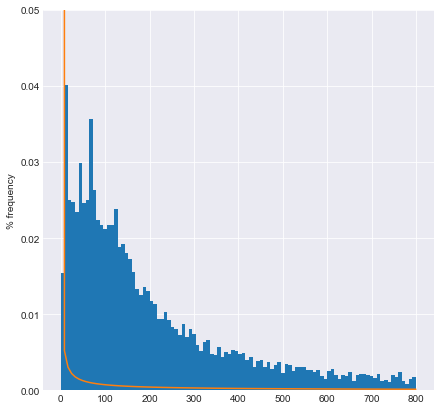

In [10]:
#Proceeding as before...

b_init_2 = b_MLE  # initial guess at b
a_init_2 = a_MLE  # initial guess at a
m_init_2 = 1
params_init_2 = np.array([a_init_2, b_init_2, m_init_2])

results_2 = opt.minimize(crit_GG, params_init_2, args=meddata, method ='L-BFGS-B', bounds=((1e-5, None), (1e-5, None), (1e-5, None) ))
a_MLE_g, b_MLE_g, m_MLE_g = results_2.x
loglikval_2 = -results_2.fun
print('a_ML_gE=', a_MLE_g, ' b_MLE_g=', b_MLE_g, 'm_MLE_g=', m_MLE_g, 'Loglikvalmax=', loglikval_2)

plt.figure(figsize=(7, 7))
plt.hist(meddata, bins=100, range=(0, 800), weights=weights)
dom = np.linspace(1e-5, 800, 100)
plt.plot(dom, gg_pdf(dom, a_MLE_g, b_MLE_g, m_MLE_g))
plt.ylim(0, 0.05)
plt.ylabel('% frequency')
plt.show()

(d)

In [11]:
import scipy
def gb2_pdf(x, a, b, p, q): 
    '''Get me the generalised beta 2 dist'''
    top = a*x**(a*p-1)
    bottom  = b**(a*p)* scipy.special.beta(p, q)*(1 + (x/b)**a)**(p+q)
    return top/bottom
    
def log_lik_GB2(xvals, a, b, p, q):
    '''Get me the log likelihood'''
    pdf_vals = gb2_pdf(xvals, a, b, p, q)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit_GB2(params, *args):
    'Criterion function, i.e. negative log likelihood'
    a, b, p, q = params
    xvals = args
    log_lik_val = log_lik_GB2(xvals, a, b, p, q)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

a_MLE_b= 0.10746439856808389  b_MLE_b= 4451892.226810002 p_MLE_b= 51.21534885333929 q_MLE_b= 150.41330383957978 Loglikvalmax= -74877.5875438232


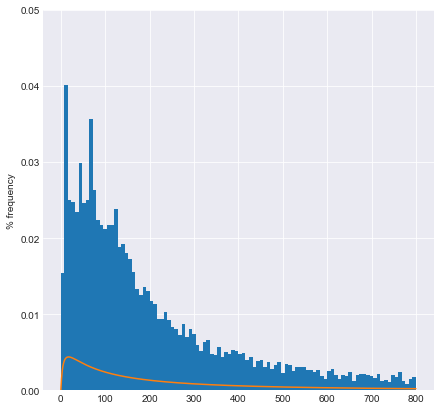

In [12]:
#Proceeding as before...

b_init_3 = b_MLE_g*200**(1/m_MLE_g)  # initial guess at b
a_init_3 = m_MLE_g  # initial guess at a
p_init_3 = a_MLE_g/b_MLE_g
q_init_3 = 200

params_init_3 = np.array([a_init_3, b_init_3, p_init_3, q_init_3])

results_3 = opt.minimize(crit_GB2, params_init_3, args=meddata, method ='L-BFGS-B', bounds=((1e-5, None),\
                                                                                            (1e-5, None),\
                                                                                            (1e-5, None),\
                                                                                            (1e-5, None) ), tol=1e-10)
a_MLE_b, b_MLE_b, p_MLE_b, q_MLE_b = results_3.x
loglikval_3 = -results_3.fun
print('a_MLE_b=', a_MLE_b, ' b_MLE_b=', b_MLE_b, 'p_MLE_b=', p_MLE_b, 'q_MLE_b=', q_MLE_b, 'Loglikvalmax=', loglikval_3)

plt.figure(figsize=(7, 7))
plt.hist(meddata, bins=100, range=(0, 800), weights=weights)
dom = np.linspace(1e-5, 800, 1000)
plt.plot(dom, gb2_pdf(dom, a_MLE_b, b_MLE_b, p_MLE_b, q_MLE_b))
plt.ylim(0, 0.05)
plt.ylabel('% frequency')
plt.show()

(e)

In [13]:
import scipy.stats as sts

log_lik_h0 = log_lik_GB2(meddata, a_MLE_b, b_MLE_b, p_MLE_b, q_MLE_b)
log_lik_h1c = log_lik_GG(meddata, a_MLE_g, b_MLE_g, m_MLE_g)
log_lik_h1b = log_lik_gam(meddata, a_MLE, b_MLE)

LR_val_b = -2 * (log_lik_h1b - log_lik_h0)
LR_val_c = -2 * (log_lik_h1c - log_lik_h0)
chi_b = 1 - sts.chi2.cdf(LR_val_b, df = 4)
chi_c = 1 - sts.chi2.cdf(LR_val_c, df = 4)
print('chi squared LR test p value b vs d = ', chi_b)
print('chi squared LR test p value c vs d = ', chi_c)

chi squared LR test p value b vs d =  0.0
chi squared LR test p value c vs d =  0.0


(f)

In [14]:
from scipy import integrate
prob_GB2_1000 = integrate.quad(gb2_pdf,1000, np.inf
                               ,args = (a_MLE_b, b_MLE_b, p_MLE_b, q_MLE_b))
                                                              
prob_GA_1000 = integrate.quad(gamma_pdf, 1000, np.inf,
                              args = (a_MLE, b_MLE))
print("Probability_GB2 of healthcare claim above 1000: ", prob_GB2_1000[0])
print("Probability_GA of healthcare claim above 1000: ", prob_GA_1000[0])

Probability_GB2 of healthcare claim above 1000:  0.13158995906022686
Probability_GA of healthcare claim above 1000:  0.45195973551759305


### Ex 2

In [15]:
import pandas as pd
macdata = pd.read_csv('MacroSeries.txt', header=None)
macdata.columns = ['ct', 'kt', 'wt', 'rt', 'yt']
macdata.head()

,ct,kt,wt,rt,yt
0,1.128323e+07,8.040697e+06,1.120211e+07,1.008852,1.931398e+07
1,1.215464e+07,8.030754e+06,1.206726e+07,1.088112,2.080561e+07
2,1.097303e+07,8.650974e+06,1.089414e+07,0.911904,1.878300e+07
3,9.711635e+06,7.809971e+06,9.641815e+06,0.893986,1.662382e+07
4,9.245673e+06,6.912184e+06,9.179203e+06,0.961637,1.582621e+07


(a)

In [16]:
from scipy.stats import norm

def get_z(w, k, alpha): 
    '''Get me a series of z's for some series of k and w and a parameter alpha'''
    zt = np.log(w/((1-alpha)*k**alpha))
    return zt
    
def log_lik_BM_1(w, k, alpha, mu, sigma, rho):
    '''Get me the log likelihood of the z values pdf for some data and params'''
    zvals = get_z(w, k, alpha)
    log_lik_val = 0
    for i in range(len(zvals)):
        if i == 0:
            pdf_val = norm.pdf(mu, loc=mu, scale=sigma)
        else:
            pdf_val = norm.pdf(zvals[i], loc=(rho*zvals[i-1] + (1-rho)*mu), scale=sigma)
        ln_pdf_val = np.log(pdf_val)
        log_lik_val += ln_pdf_val
    return log_lik_val

def crit_BM_1(params, *args):
    '''Define a criterion function to minimise
    in this case the negative of the log likelihood'''
    alpha, mu, sigma, rho = params
    w, k = args
    log_lik_val = log_lik_BM_1(w, k, alpha, mu, sigma, rho)
    neg_log_lik_val = -log_lik_val
    return -log_lik_val

In [17]:
params_init_BM_1 = np.array([0.4, 0.4, 5, 0.8])
mle_BM_args = (macdata.wt, macdata.kt)
results_BM_1 = opt.minimize(crit_BM_1, params_init_BM_1, args=mle_BM_args, method ='L-BFGS-B', bounds=((1e-2, 0.99),\
                                                                                                       (1e-2, None),\
                                                                                                      (1e-2, None),\
                                                                                                      (-0.99, 0.99)), tol=1e-6)
alpha_mle, mu_mle, sigma_mle, rho_mle = results_BM_1.x
loglikval_BM = -results_BM_1.fun
print('alpha_mle=', alpha_mle, '\n mu_mle=', mu_mle, '\n sigma_mle:', sigma_mle, '\n rho_mle:', rho_mle, '\n Loglikvalmax=', loglikval_BM)

alpha_mle= 0.5533478996963856 
 mu_mle= 8.107379159137771 
 sigma_mle: 0.09277945625591325 
 rho_mle: 0.8246331724602739 
 Loglikvalmax= 95.85827424297592


In [18]:
results_BM_1

      fun: -95.85827424297592
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.34720813,  0.02669651, -0.01877538, -0.01134737])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 260
      nit: 40
   status: 0
  success: True
        x: array([0.5533479 , 8.10737916, 0.09277946, 0.82463317])

(b)

In [20]:
def get_z_2(r, k, alpha): 
    '''Get me a series of z's for some series of k and r and a parameter alpha'''
    zt = np.log(r/((alpha)*k**(alpha-1)))
    return zt
    
def log_lik_BM_2(r, k, alpha, mu, sigma, rho):
    '''Get me the log likelihood of the z values pdf for some data and params'''
    zvals = get_z_2(r, k, alpha)
    log_lik_val = 0
    for i in range(len(zvals)):
        if i == 0:
            pdf_val = norm.pdf(mu, loc=mu, scale=sigma)
        else:
            pdf_val = norm.pdf(zvals[i], loc=(rho*zvals[i-1] + (1-rho)*mu), scale=sigma)
        ln_pdf_val = np.log(pdf_val)
        log_lik_val += ln_pdf_val
    return log_lik_val

def crit_BM_2(params, *args):
    '''Define a criterion function to minimise
    in this case the negative of the log likelihood'''
    alpha, mu, sigma, rho = params
    r, k = args
    log_lik_val = log_lik_BM_2(r, k, alpha, mu, sigma, rho)
    neg_log_lik_val = -log_lik_val
    return -log_lik_val


params_init_BM_2 = np.array([0.4, 0.4, 0.4, 0.8])
mle_BM_args_2 = (macdata.rt, macdata.kt)
results_BM_2 = opt.minimize(crit_BM_2, params_init_BM_2, args=mle_BM_args_2, method ='L-BFGS-B', bounds=((1e-2, 0.99),\
                                                                                                       (1e-2, None),\
                                                                                                      (1e-2, None),\
                                                                                                      (-0.99, 0.99)))
alpha_mle_2, mu_mle_2, sigma_mle_2, rho_mle_2 = results_BM_2.x
loglikval_BM_2 = -results_BM_2.fun
print('alpha_mle=', alpha_mle_2, '\n mu_mle=', mu_mle_2, '\n sigma_mle:', sigma_mle_2, '\n rho_mle:', rho_mle_2, '\n Loglikvalmax=', loglikval_BM_2)

alpha_mle= 0.553340406136769 
 mu_mle= 7.570429565482019 
 sigma_mle: 0.09278247677902113 
 rho_mle: 0.8246543401866663 
 Loglikvalmax= 95.85827530681503


(c)

In [21]:
ztm1 = 10
kt = 7500000

def z_star(k, alpha):
    '''Give me the z* such that r is 1'''
    z_star = np.log(1/(alpha*k**(alpha-1)))
    return z_star

cdf = norm.cdf((z_star(kt, alpha_mle) - (rho_mle*ztm1 + (1-rho_mle)*mu_mle))/sigma_mle)
prob = 1.0-cdf
print('cdf value:', cdf, 'probability:', prob) #probability very close to 1

cdf value: 6.174818368084603e-104 probability: 1.0


### Ex 3

In [4]:
incdata = pd.read_csv('usincmoms.txt', delimiter ='\t' ,header=None)
incdata.columns = ['perc', 'mid']
incdata.head()

,perc,mid
0,0.035190,2500
1,0.041062,7500
2,0.058859,12500
3,0.056836,17500
4,0.058595,22500


(a)

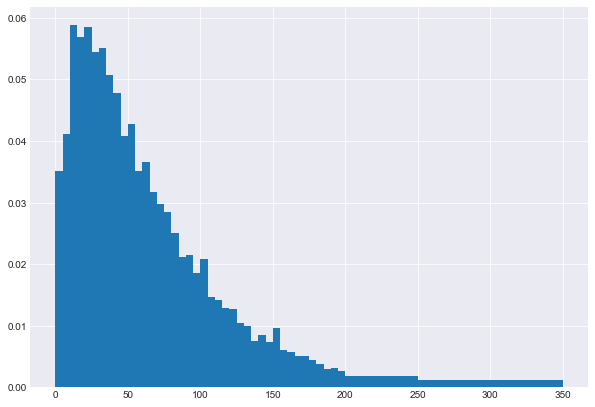

In [7]:
bar_perc = incdata.perc.copy()
bar_perc[41] = incdata.perc[41].copy()/20
bar_perc[40] = incdata.perc[40].copy()/10
widths = np.ones(42)*5
widths[41] = 100
widths[40] = 50
plt.figure(figsize=(10, 7))
plt.bar(incdata.mid/1000, bar_perc, width=widths, align='center')
plt.show()

(b)

In [92]:
#Make bin upper bounds
bins = np.zeros(42)
bins[0] = 5000.0
for i in range(1, 40):
    bins[i] = (incdata.mid[i] + incdata.mid[i+1])/2

bins[39] = 200000.0
bins[40] = 250000.0
bins[41] = np.inf

In [93]:
from scipy import stats
def model_moments(mu, sigma):
    '''
    --------------------------------------------------------------------
    This function computes the percentage of households in each band
    given some mu and sigma of a log-normal distribution.
    --------------------------------------------------------------------
    INPUTS:
    mu     = scalar, mean of the log-normally distributed random variable
    sigma  = scalar > 0, standard deviation of the log-normally distributed
             random variable
    
    OBJECTS CREATED WITHIN FUNCTION:
    42 different distributive bins
    
    RETURNS: distribution
    --------------------------------------------------------------------
    '''
    dist = np.zeros(42) #42 bins to fill with percentages
    dist_1 = stats.norm.cdf(np.log(bins), mu, sigma)
    bins_2 = np.roll(bins, 1)
    bins_2[0] = 1e-20
    dist_2 = stats.norm.cdf(np.log(bins_2), mu, sigma)
    dist = dist_1 - dist_2
    
    return dist

In [94]:
def err_vec(data_dist, mu, sigma):
    '''
    --------------------------------------------------------------------
    This function computes the vector of moment errors (in percent
    deviation from the data moment vector) for GMM.
    --------------------------------------------------------------------
    INPUTS:
    data_dist  = moments of data
    mu     = scalar, mean of the log-normally distributed random variable
    sigma  = scalar > 0, standard deviation of the log-normally distributed
             random variable
    
    RETURNS: err_vec
    --------------------------------------------------------------------
    '''
    err_vec = (model_moments(mu, sigma) - data_dist)/data_dist
    
    return err_vec

In [95]:
def criterion(params, *args):
    '''
    --------------------------------------------------------------------
    This function computes the GMM weighted sum of squared moment errors
    criterion function value given parameter values and an estimate of
    the weighting matrix.
    --------------------------------------------------------------------'''
    mu, sigma = params
    data_dist, W = args
    err = err_vec(data_dist, mu, sigma)
    crit_val = np.dot(np.dot(err.T, W), err)
    return crit_val

In [96]:
#Define some weight matrix W

W_b = np.diag(incdata.perc)

In [97]:
#Now lets solve
mu_init_b = 4.0
sig_init_b = 1.0
params_init_b = np.array([mu_init_b, sig_init_b])
gmm_args_b = (incdata.perc, W_b)

results_b = opt.minimize(criterion, params_init_b, args=(gmm_args_b),
                        method = 'L-BFGS-B', bounds = ((1e-10, None), (1e-10, None)))

mu_gmm, sigma_gmm = results_b.x
results_b

      fun: 0.04594528253308932
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 6.15479889e-07, -5.27425326e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 102
      nit: 9
   status: 0
  success: True
        x: array([10.76684526,  0.90783951])

In [98]:
def LN_pdf(xvals, mu, sigma):
    pdf_vals= (1/(xvals * sigma * np.sqrt(2 * np.pi)) *\
               np.exp(-(np.log(xvals) - mu)**2 /(2 * sigma**2)))
    return pdf_vals

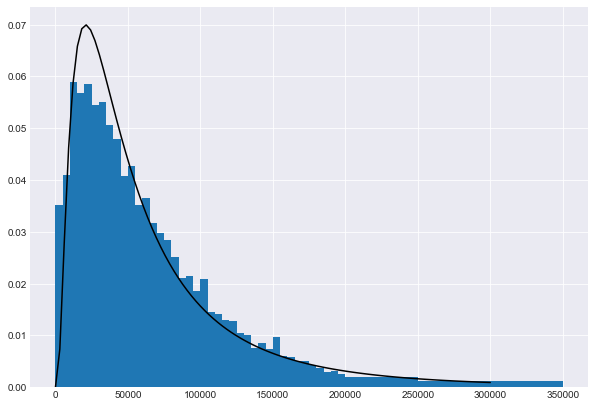

In [106]:
dom_b = np.linspace(0.00001, 300000, 100)
plt.figure(figsize=(10, 7))
plt.bar(incdata.mid, bar_perc, width=widths*1000, align='center')
plt.plot(dom_b, 5000*LN_pdf(dom_b, mu_gmm, sigma_gmm), 'k-')
#plt.plot(dom_b, LN_pdf(dom_b, mu_gmm, sigma_gmm), 'k-')
plt.show()

(c)

In [110]:
def model_momentsGA(xvals, alpha, beta):
    
    pdf_vals = 1/((beta ** alpha) * math.gamma(alpha)) * (xvals ** (alpha - 1)) * np.exp(-xvals/beta)
    
    return 5000 * pdf_vals

def err_vecGA(alpha, beta, perc, simple = False):
    modelpcts = model_momentsGA(incdata.mid, alpha, beta)
    
    if simple:
        err_vec1 = modelpcts - perc
    else:
        err_vec1 = (modelpcts - perc)/perc
    return err_vec1

def critGA(params, *args):
    alpha, beta = params
    pcts, W = args
    err = err_vecGA(alpha, beta, pcts)
    crit_val = np.dot(np.dot(err.T, W),err)
    return crit_val

alpha_init = 3.0
beta_init = 20000
params_init_c = np.array([alpha_init, beta_init])
gmm_args_c = (incdata.perc, W_b)

results_c = opt.minimize(critGA, params_init_c, args=(gmm_args_c),
                       method='L-BFGS-B', bounds=((1e-8, None), (1e-8, None)))

alpha_gmm_c, beta_gmm_c = results_c.x

results_c

      fun: 0.044002387695191124
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([3.15435178e-05, 6.93889390e-10])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 114
      nit: 28
   status: 0
  success: True
        x: array([1.42440581e+00, 4.50584624e+04])

In [111]:
def pdf_GA(xvals, alpha, beta):
    
    pdf_vals = 1/((beta ** alpha) * math.gamma(alpha)) * (xvals ** (alpha - 1)) * np.exp(-xvals/beta)
    
    return 5000 * pdf_vals

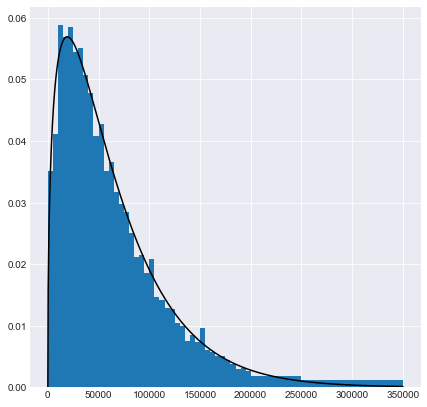

In [117]:
x = np.linspace(0.000001,350000,1000)
y = model_momentsGA(x, alpha_gmm_c, beta_gmm_c)

plt.subplots(figsize=(7, 7))
plt.bar(incdata.mid, bar_perc, width=widths*1000, align='center')
plt.plot(x,y, 'k-')
plt.show()

(d)

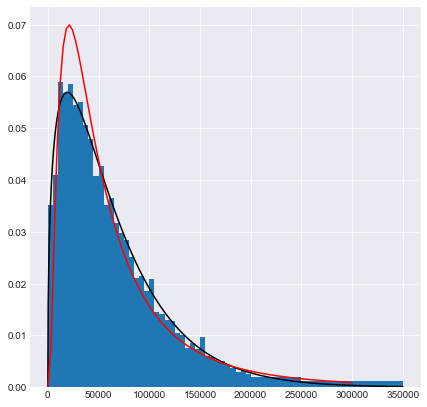

In [119]:
plt.subplots(figsize=(7, 7))
plt.bar(incdata.mid, bar_perc, width=widths*1000, align='center')
plt.plot(x, y, 'k-')
plt.plot(dom_b, 5000*LN_pdf(dom_b, mu_gmm, sigma_gmm), 'r-')
plt.show()

(e)

In [123]:
alpha_init = 3.0
beta_init = 20000

params_init_d = np.array([alpha_init, beta_init])
gmm_args_d = (incdata.perc, np.eye(42))

results_I = opt.minimize(critGA, params_init_d, args=(gmm_args_d),
                       method='L-BFGS-B', bounds=((1e-8, None), (1e-8, None)))

alpha_gmm_I, beta_gmm_I = results_I.x

W_e = (1/42)*(err_vecGA(alpha_gmm_I, beta_gmm_I, incdata.perc) @ err_vecGA(alpha_gmm_I, beta_gmm_I, incdata.perc))

gmm_args_e = (incdata.perc, W_e)

results_e = opt.minimize(critGA, params_init_d, args=(gmm_args_e),
                       method='L-BFGS-B', bounds=((1e-8, None), (1e-8, None)))

alpha_gmm_e, beta_gmm_e = results_e.x
results_e

      fun: 0.10768539998328276
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.30024333e-05, -4.16333634e-09])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 159
      nit: 32
   status: 0
  success: True
        x: array([1.42613756e+00, 4.42118377e+04])

In [124]:
print(alpha_gmm_e, alpha_gmm_c)

1.426137557519175 1.4244058051708597


In [125]:
print(beta_gmm_e, beta_gmm_c)

44211.83774404105 45058.46236570777


### Ex 4

In [2]:
macdata = pd.read_csv('MacroSeries.txt', header=None)
macdata.columns = ['ct', 'kt', 'wt', 'rt', 'yt']
macdata.head()

,ct,kt,wt,rt,yt
0,1.128323e+07,8.040697e+06,1.120211e+07,1.008852,1.931398e+07
1,1.215464e+07,8.030754e+06,1.206726e+07,1.088112,2.080561e+07
2,1.097303e+07,8.650974e+06,1.089414e+07,0.911904,1.878300e+07
3,9.711635e+06,7.809971e+06,9.641815e+06,0.893986,1.662382e+07
4,9.245673e+06,6.912184e+06,9.179203e+06,0.961637,1.582621e+07


In [45]:
def get_z(w, k, alpha): 
    '''Get me a series of z's for some series of k and w and
    a parameter alpha'''
    zt = np.log(w/((1-alpha)*k**alpha))
    return zt

def errvec_mac(alpha, beta, rho, mu, w, k, ct, rt):
    
    zt = get_z(w, k, alpha)
    ztp1 = np.roll(zt, 1)
    
    rtp1 = np.roll(rt, 1)
    
    ctp1 = np.roll(ct, 1)
    
    ktp1 = np.roll(k, 1)
    
    #condition 1
    err_1 = ztp1 - rho*zt - (1-rho)*mu
    err_1[0] = 0
    
    #condition 2
    err_2 = (ztp1 - rho*zt - (1-rho)*mu)*zt
    err_2[0] = 0
    
    #condition 3
    err_3 = beta*alpha*np.exp(ztp1)*(ktp1**(alpha -1))*ct/ctp1 -1
    err_3[0] = 0
    
    #condition 4
    err_4 = (beta*alpha*np.exp(ztp1)*(ktp1**(alpha -1))*ct/ctp1 -1)*w
    err_4[0] = 0
    

    err_1_mean = err_1.mean() - 1e-9
    err_2_mean = err_2.mean() - 1e-9
    err_3_mean = err_3.mean() - 1e-9
    err_4_mean = err_4.mean() - 1e-9
    
    results = np.array([err_1_mean, err_2_mean, err_3_mean, err_4_mean])
    return results

In [46]:
def criterion_mac(params, *args):
    '''
    --------------------------------------------------------------------
    This function computes the GMM weighted sum of squared moment errors
    criterion function value given parameter values and an estimate of
    the weighting matrix.
    --------------------------------------------------------------------'''
    alpha, beta, rho, mu = params
    w, k, ct, rt, W = args
    err = errvec_mac(alpha, beta, rho, mu, w, k, ct, rt)
    crit_val = np.dot(np.dot(err.T, W), err)
    return crit_val

In [47]:
#Define some weight matrix W

W_mac = np.eye(4)

In [49]:
#Now lets solve
alpha_init_mac = 0.1
beta_init_mac = 0.2
rho_init_mac = 0.2
mu_init_mac = 5.0

params_init_mac = np.array([alpha_init_mac,
                            beta_init_mac,
                            rho_init_mac,
                            mu_init_mac])

gmm_args_mac = (macdata.wt, macdata.kt, macdata.ct, macdata.rt, W_mac)

results_mac = opt.minimize(criterion_mac,
                           params_init_mac,
                           args=(gmm_args_mac),
                           method = 'L-BFGS-B',
                           bounds = ((1e-10, 0.9999), (1e-10, 0.9999), (-0.9999, 0.9999), (1e-10, None)))

results_mac

      fun: 471.6514191861134
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.67547611e+07,  3.75079392e+06, -1.17761361e+03, -2.86916827e+02])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 170
      nit: 7
   status: 0
  success: True
        x: array([0.54185003, 0.59232147, 0.2       , 5.        ])